<a href="https://colab.research.google.com/github/jakariaemon/ComputerVision/blob/main/(Assignment%202)Cross_Validation_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1140/1140 [==============================] - 19s 10ms/step - loss: 1.4693 - accuracy: 0.4728
Epoch 2/5
1140/1140 [==============================] - 11s 10ms/step - loss: 1.0645 - accuracy: 0.6243
Epoch 3/5
1140/1140 [==============================] - 11s 10ms/step - loss: 0.9166 - accuracy: 0.6802
Epoch 4/5
1140/1140 [==============================] - 11s 10ms/step - loss: 0.8021 - accuracy: 0.7208
Epoch 5/5
1140/1140 [==============================] - 11s 10ms/step - loss: 0.7081 - accuracy: 0.7526
Score for fold 1: loss of 0.892488956451416; accuracy of 68.96666884422302%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1140/1140 [==============================] - 11s 10ms/step - loss: 1.5394 - accuracy: 0.4375
Epoch 2/5
1140/1140 [==============================] - 11s 9ms/step - loss: 1.1775 - accuracy: 0.5828
Epoch 3/5


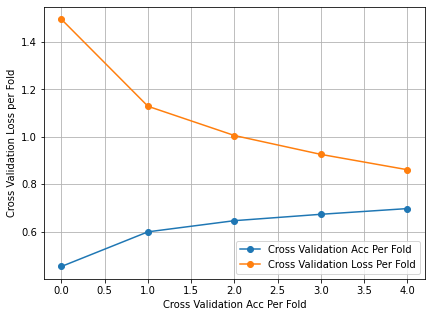

------------------------------------------------------------------------
> Fold 2 - Loss: 0.9772917628288269 - Accuracy: 66.73333048820496%


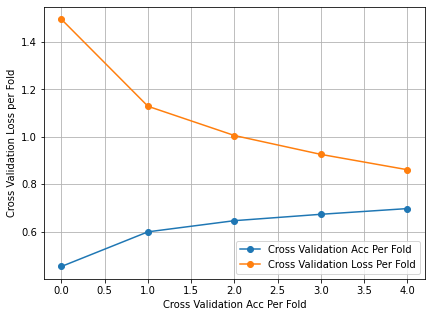

------------------------------------------------------------------------
> Fold 3 - Loss: 0.9680495858192444 - Accuracy: 66.20000004768372%


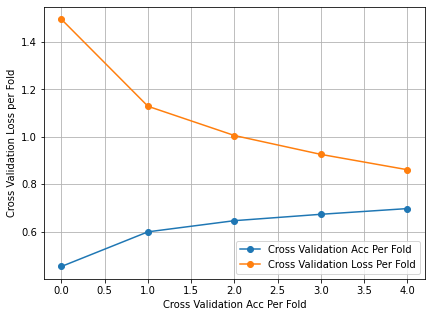

------------------------------------------------------------------------
> Fold 4 - Loss: 0.9698648452758789 - Accuracy: 67.73333549499512%


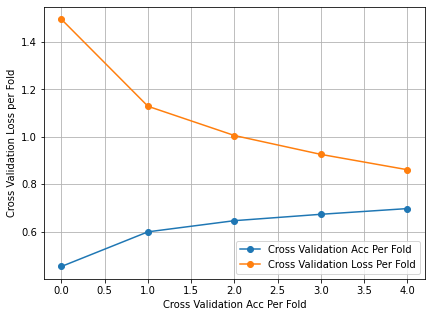

------------------------------------------------------------------------
> Fold 5 - Loss: 1.0119324922561646 - Accuracy: 64.3666684627533%


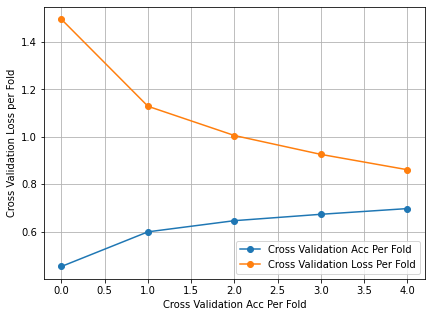

------------------------------------------------------------------------
> Fold 6 - Loss: 0.9035844802856445 - Accuracy: 68.36666464805603%


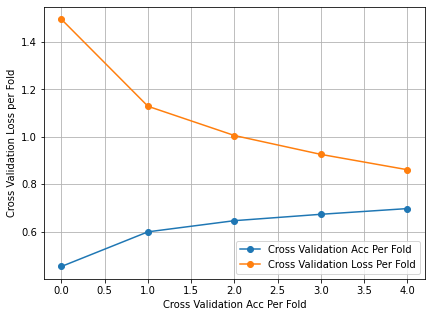

------------------------------------------------------------------------
> Fold 7 - Loss: 0.8551387786865234 - Accuracy: 69.49999928474426%


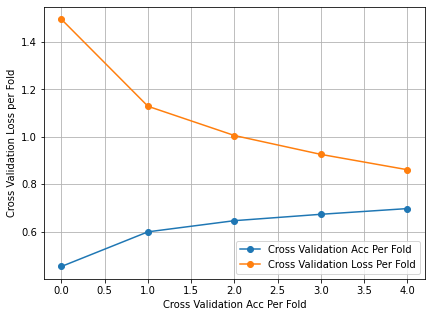

------------------------------------------------------------------------
> Fold 8 - Loss: 0.8898751735687256 - Accuracy: 69.46666836738586%


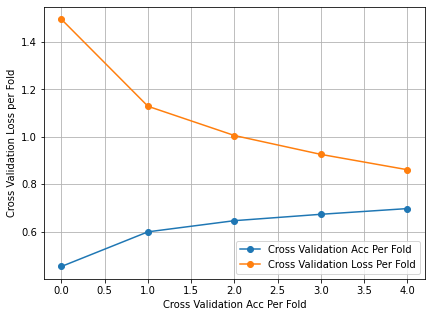

------------------------------------------------------------------------
> Fold 9 - Loss: 0.9521444439888 - Accuracy: 67.00000166893005%


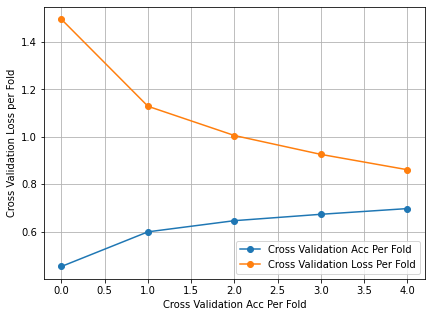

------------------------------------------------------------------------
> Fold 10 - Loss: 0.920539379119873 - Accuracy: 68.16666722297668%


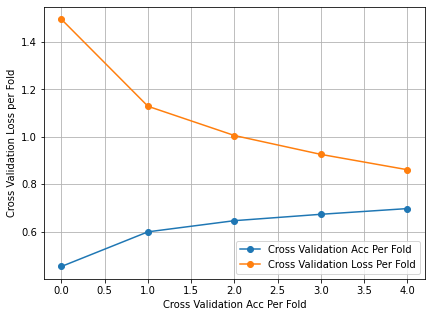

------------------------------------------------------------------------
> Fold 11 - Loss: 0.9862565398216248 - Accuracy: 66.06666445732117%


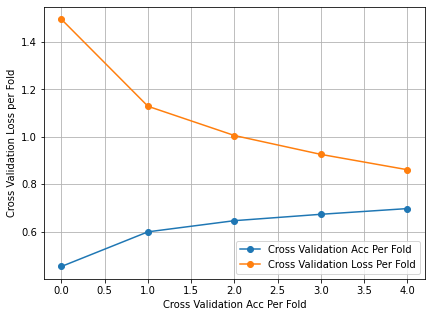

------------------------------------------------------------------------
> Fold 12 - Loss: 0.9600927829742432 - Accuracy: 65.43333530426025%


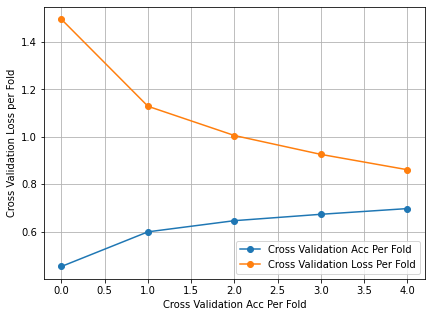

------------------------------------------------------------------------
> Fold 13 - Loss: 0.9101224541664124 - Accuracy: 68.30000281333923%


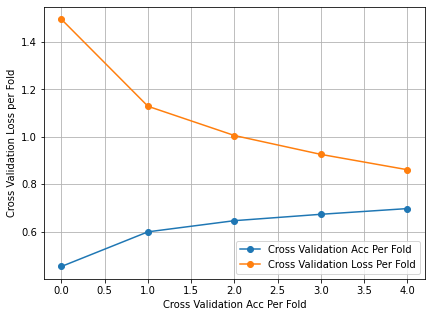

------------------------------------------------------------------------
> Fold 14 - Loss: 0.9177802801132202 - Accuracy: 67.59999990463257%


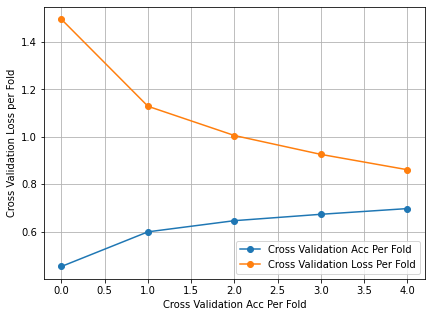

------------------------------------------------------------------------
> Fold 15 - Loss: 0.9181632399559021 - Accuracy: 67.10000038146973%


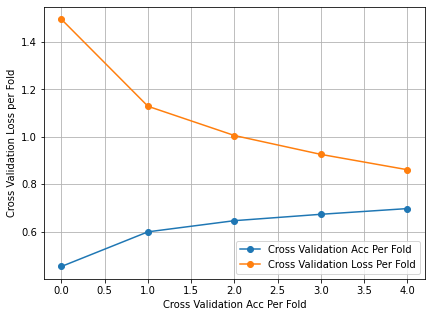

------------------------------------------------------------------------
> Fold 16 - Loss: 0.9095461368560791 - Accuracy: 68.16666722297668%


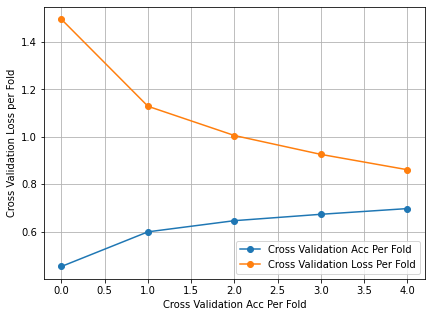

------------------------------------------------------------------------
> Fold 17 - Loss: 0.9247305393218994 - Accuracy: 67.69999861717224%


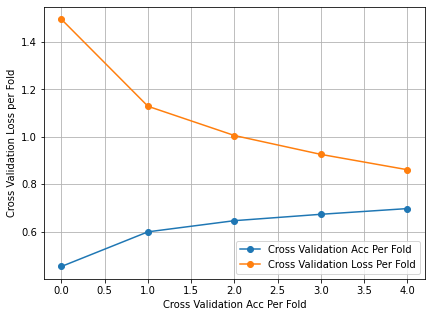

------------------------------------------------------------------------
> Fold 18 - Loss: 0.8596946001052856 - Accuracy: 70.53333520889282%


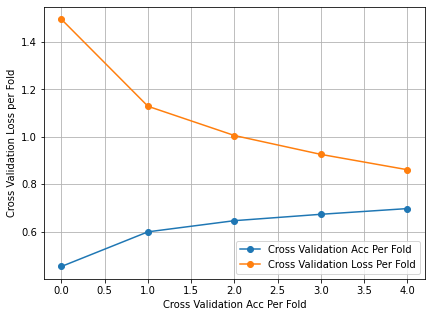

------------------------------------------------------------------------
> Fold 19 - Loss: 1.0286725759506226 - Accuracy: 64.46666717529297%


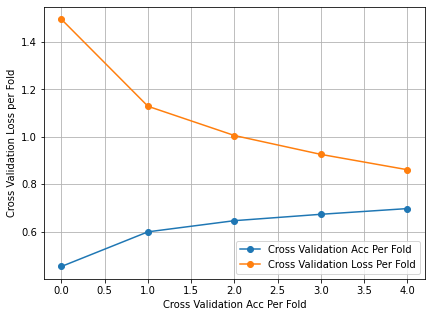

------------------------------------------------------------------------
> Fold 20 - Loss: 0.9743979573249817 - Accuracy: 65.9333348274231%


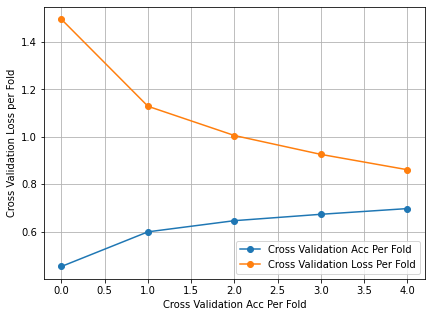

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.39000052213669 (+- 1.6101105451830475)
> Loss: 0.9365183502435684
------------------------------------------------------------------------


In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 20

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show() 
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')